In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)


In [ ]:
import os
import boto3
import re
import sagemaker
from sagemaker.amazon.amazon_estimator import get_image_uri 

role = sagemaker.get_execution_role()
region = boto3.Session().region_name

# S3 bucket for saving code and model artifacts.
# Feel free to specify a different bucket and prefix
bucket = "strokepred02"
# place to upload training files within the bucket
print (region)

In [ ]:
role

In [ ]:
s3 = boto3.resource('s3')
try:
    if  region == 'us-east-1':
        s3.create_bucket(Bucket=bucket)
    print('S3 bucket created successfully')
except Exception as e:
    print('S3 error: ',e)

In [ ]:
# set an output path where the trained model will be saved
prefix = 'xgboost-implementation'
output_path ='s3://{}/{}/output'.format(bucket, prefix)
print(output_path)

In [2]:
df = pd.read_csv('stroke-data.csv')

In [3]:
#GET THE FIRST 5 ROWS:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#GET THE LIST OF COLUMNS IN DATASET:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
#GET THE STATISTICS OF DATA:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


DATA VISUALIZATION

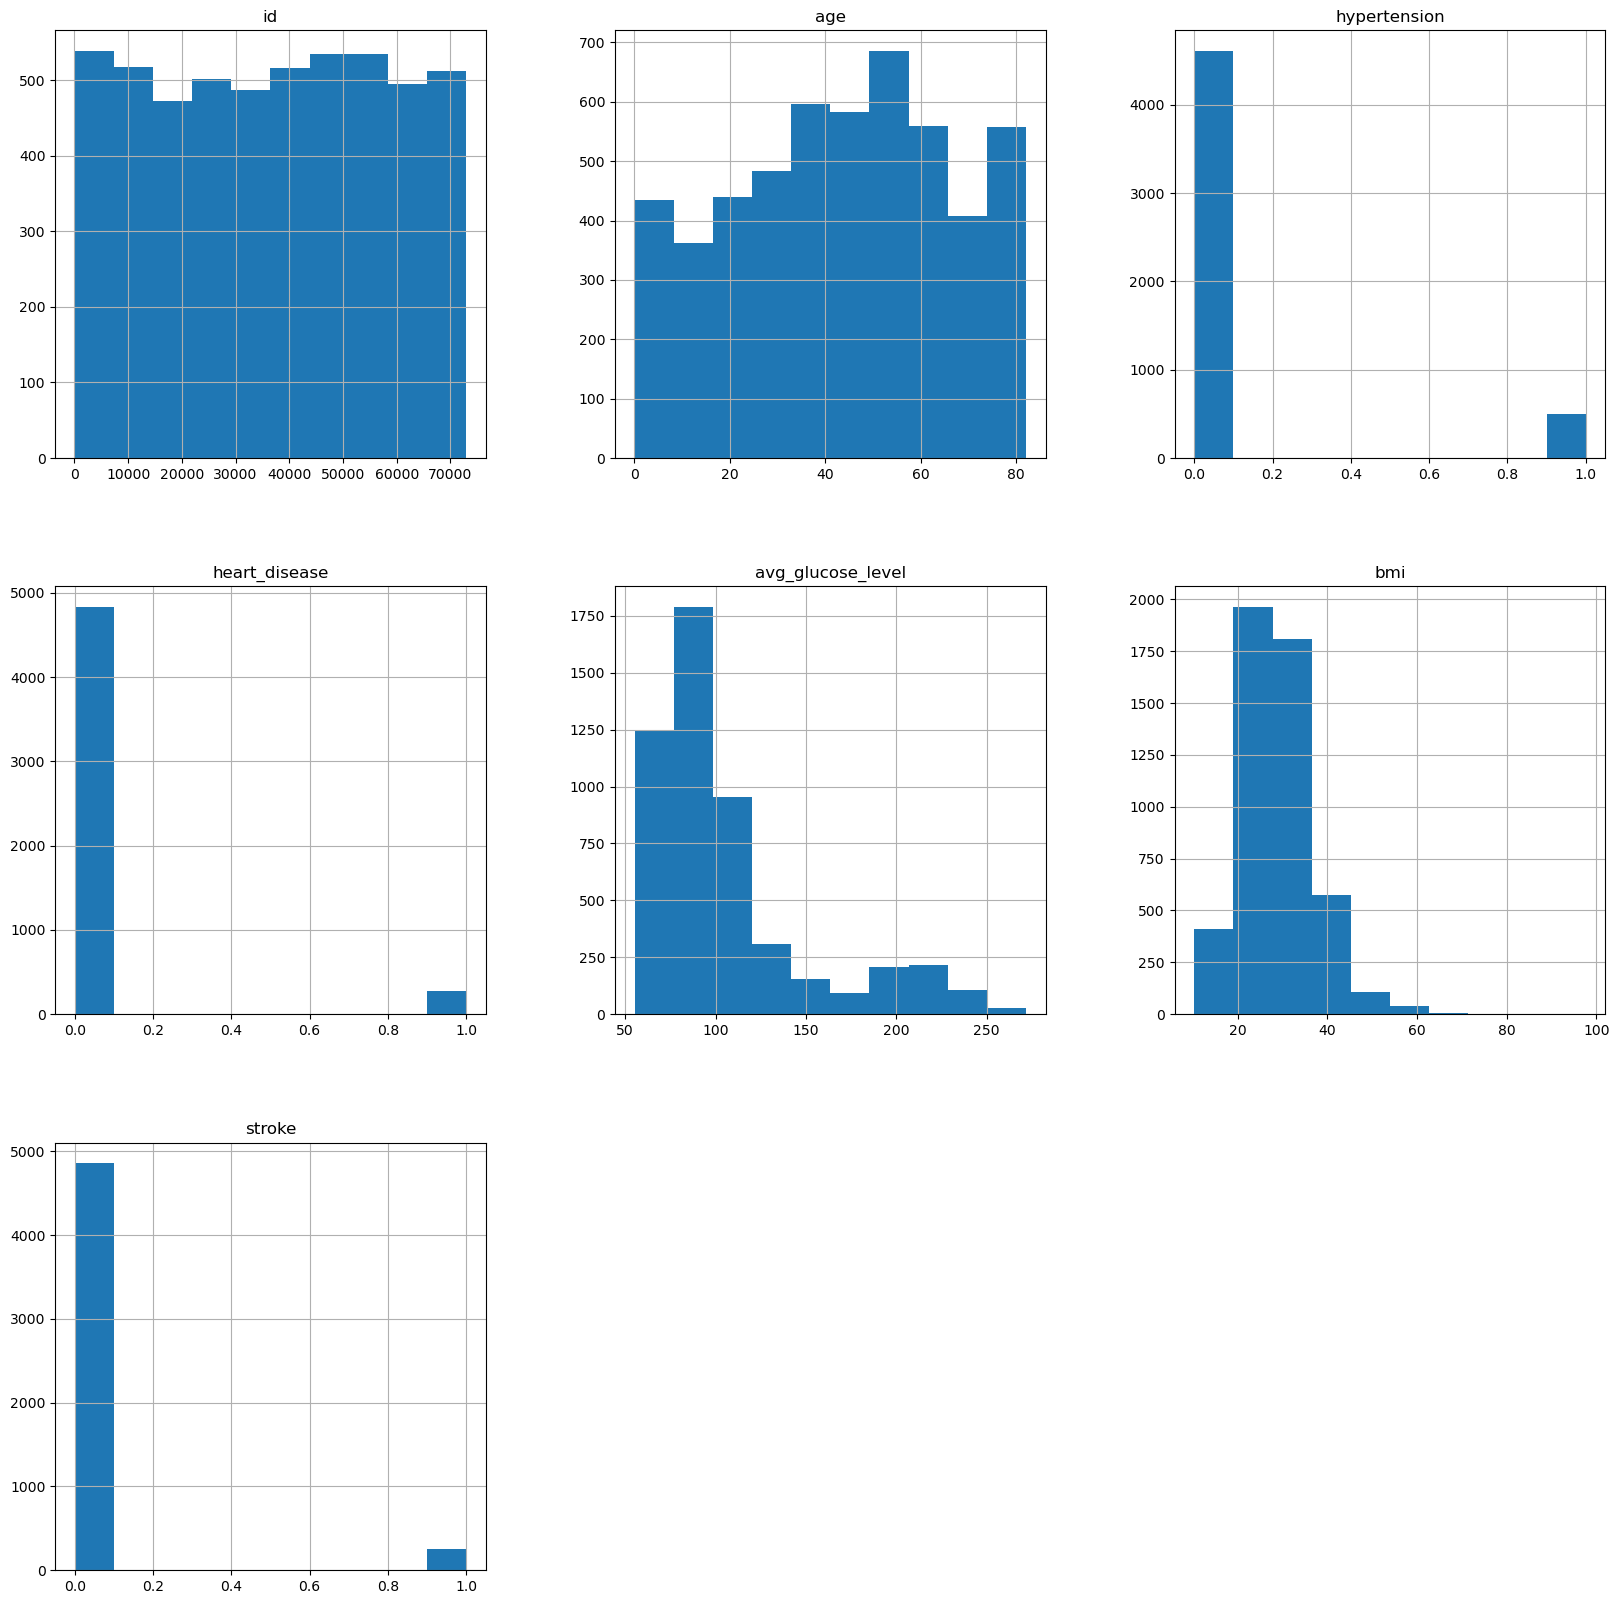

In [7]:
# Plot histograms of each parameter 

df.hist(figsize = (20, 20))
plt.show()

/var/folders/20/g3kpbwhd1sd3gwq9d2zdcf5r0000gn/T/ipykernel_81231/1223529681.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avg_glucose_level'], color = 'cyan')
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before oper

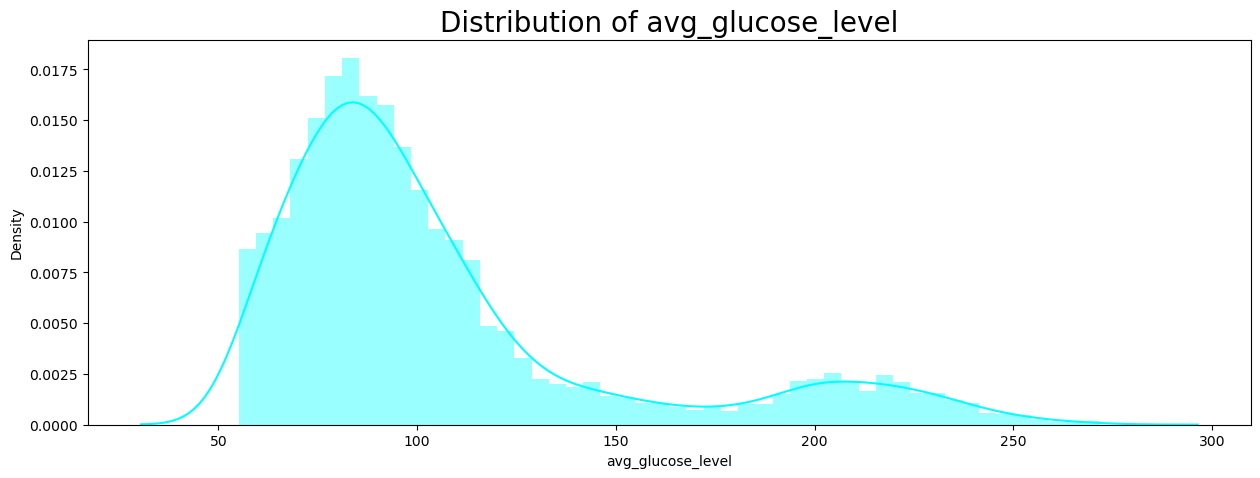

In [8]:
plt.subplots(figsize=(15,5))
sns.distplot(df['avg_glucose_level'], color = 'cyan')
plt.title('Distribution of avg_glucose_level', fontsize = 20)
plt.show()

/var/folders/20/g3kpbwhd1sd3gwq9d2zdcf5r0000gn/T/ipykernel_81231/2737282522.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], color = 'cyan')
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

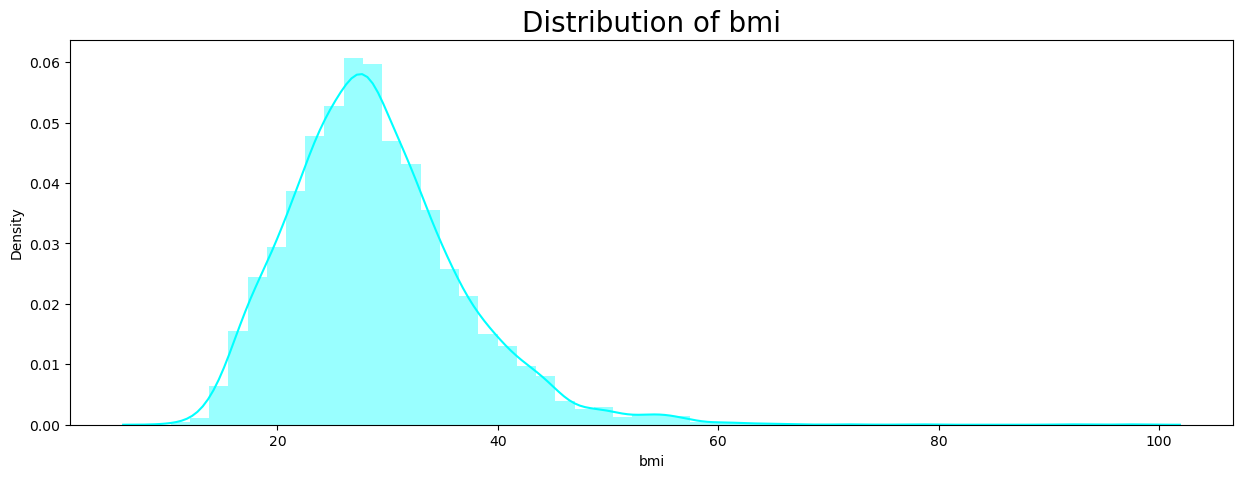

In [9]:
plt.subplots(figsize=(15,5))
sns.distplot(df['bmi'], color = 'cyan')
plt.title('Distribution of bmi', fontsize = 20)
plt.show()

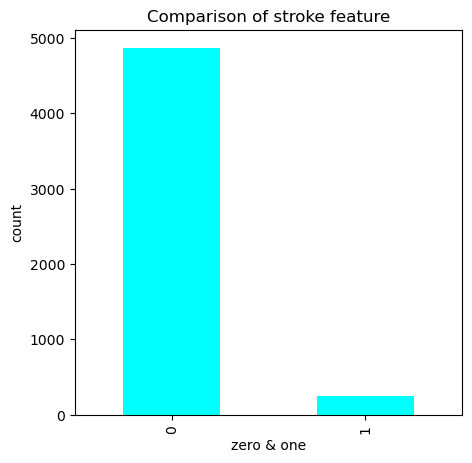

In [10]:
df['stroke'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of stroke feature')
plt.xlabel('zero & one')
plt.ylabel('count')
plt.show()

In [11]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
#WE ARE REPLACING THE NULL VALUES WITH MEAN OF THAT FEATURE.
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [13]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Axes: >

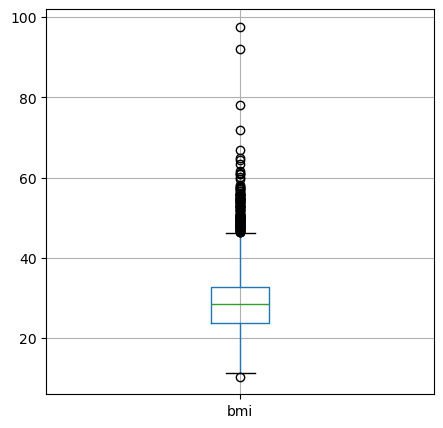

In [14]:
#BMI FEATURE:
df.boxplot(column='bmi')

<Axes: >

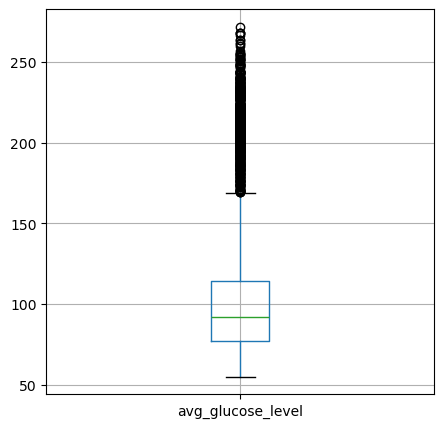

In [15]:
#AVG_GLUCOSE_LEVEL:
df.boxplot(column='avg_glucose_level')


LABEL ENCODING OF NON NUMERIC COLUMNS

In [16]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [17]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])


In [18]:
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender
df['work_type']=work_type

In [19]:
df[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()

,ever_married,Residence_type,smoking_status,gender,work_type
0,1,1,1,1,2
1,1,0,2,0,3
2,1,0,2,1,2
3,1,1,3,0,2
4,1,0,2,0,3


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [21]:
#ID COLUMN IS NOT REQUIRED.
df = df.drop('id', axis=1)

AFTER DATA IS READY FOR SPLITTING

In [29]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [23]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your original DataFrame

# Splitting the data into train, validation, and test sets
train_data, temp_data = np.split(df.sample(frac=1, random_state=0), [int(0.7 * len(df))])
validation_data, test_data = np.split(temp_data, [int(0.5 * len(temp_data))])

# Separate features and target variable
X_train = train_data.drop(["stroke"], axis=1)
y_train = train_data["stroke"]

# Print the shapes of the datasets
print("Train Data Shape:", X_train.shape)
print("Validation Data Shape:", validation_data.shape)
print("Test Data Shape:", test_data.shape)

# Apply SMOTE to the training set
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Print information before and after oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Train Data Shape: (3577, 10)
Validation Data Shape: (766, 11)
Test Data Shape: (767, 11)
Before OverSampling, counts of label '1': 166
Before OverSampling, counts of label '0': 3411 

After OverSampling, the shape of train_X: (6822, 10)
After OverSampling, the shape of train_y: (6822,) 

After OverSampling, counts of label '1': 3411
After OverSampling, counts of label '0': 3411


/Users/sharmidas/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
boto3.Session().resource("s3").Bucket(bucket).Object(
    os.path.join(prefix, "train/train.csv")
).upload_file("train.csv")
boto3.Session().resource("s3").Bucket(bucket).Object(
    os.path.join(prefix, "validation/validation.csv")
).upload_file("validation.csv")

SETUP HYPERPARAMETER TUNING

In [ ]:
from time import gmtime, strftime, sleep

tuning_job_name = "xgboost-tuningjob-" + strftime("%d-%H-%M-%S", gmtime())

print(tuning_job_name)

tuning_job_config = {
    "ParameterRanges": {
        "CategoricalParameterRanges": [],
        "ContinuousParameterRanges": [
            {
                "MaxValue": "1",
                "MinValue": "0",
                "Name": "eta",
            },
            {
                "MaxValue": "10",
                "MinValue": "1",
                "Name": "min_child_weight",
            },
            {
                "MaxValue": "2",
                "MinValue": "0",
                "Name": "alpha",
            },
        ],
        "IntegerParameterRanges": [
            {
                "MaxValue": "10",
                "MinValue": "1",
                "Name": "max_depth",
            }
        ],
    },
    "ResourceLimits": {"MaxNumberOfTrainingJobs": 10, "MaxParallelTrainingJobs": 3},
    "Strategy": "Bayesian",
    "HyperParameterTuningJobObjective": {"MetricName": "validation:mse", "Type": "Minimize"},
}

In [ ]:
from sagemaker.image_uris import retrieve

training_image = retrieve(framework="xgboost", region=region, version="1.5-1")

s3_input_train = "s3://{}/{}/train".format(bucket, prefix)
s3_input_validation = "s3://{}/{}/validation/".format(bucket, prefix)

training_job_definition = {
    "AlgorithmSpecification": {"TrainingImage": training_image, "TrainingInputMode": "File"},
    "InputDataConfig": [
        {
            "ChannelName": "train",
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_train,
                }
            },
        },
        {
            "ChannelName": "validation",
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_validation,
                }
            },
        },
    ],
    "OutputDataConfig": {"S3OutputPath": "s3://{}/{}/output".format(bucket, prefix)},
    "ResourceConfig": {"InstanceCount": 1, "InstanceType": "ml.m4.xlarge", "VolumeSizeInGB": 10},
    "RoleArn": role,
    "StaticHyperParameters": {
        "eval_metric": "auc",
        "num_round": "100",
        "objective": "binary:hinge",
        "rate_drop": "0.3",
        "tweedie_variance_power": "1.4",
    },
    "StoppingCondition": {"MaxRuntimeInSeconds": 43200},
}

LAUNCH HYPERPARAMETER TUNING

In [ ]:
smclient.create_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name,
    HyperParameterTuningJobConfig=tuning_job_config,
    TrainingJobDefinition=training_job_definition,
)

In [ ]:
smclient.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)[
    "HyperParameterTuningJobStatus"
]

In [ ]:
smclient.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)['HyperParameterTuningJobName']

In [ ]:
# run this cell to check current status of hyperparameter tuning job
tuning_job_result = smclient.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name
)

status = tuning_job_result["HyperParameterTuningJobStatus"]
if status != "Completed":
    print("Reminder: the tuning job has not been completed.")

job_count = tuning_job_result["TrainingJobStatusCounters"]["Completed"]
print("%d training jobs have completed" % job_count)

objective = tuning_job_result["HyperParameterTuningJobConfig"]["HyperParameterTuningJobObjective"]
is_minimize = objective["Type"] != "Maximize"
objective_name = objective["MetricName"]

In [ ]:
from pprint import pprint

if tuning_job_result.get("BestTrainingJob", None):
    print("Best model found so far:")
    pprint(tuning_job_result["BestTrainingJob"])
else:
    print("No training jobs have reported results yet.")

## Fetch all results as DataFrame

In [ ]:
import pandas as pd

tuner = sagemaker.HyperparameterTuningJobAnalytics(tuning_job_name)

full_df = tuner.dataframe()

if len(full_df) > 0:
    df = full_df[full_df["FinalObjectiveValue"] > -float("inf")]
    if len(df) > 0:
        df = df.sort_values("FinalObjectiveValue", ascending=is_minimize)
        print("Number of training jobs with valid objective: %d" % len(df))
        print({"lowest": min(df["FinalObjectiveValue"]), "highest": max(df["FinalObjectiveValue"])})
        pd.set_option("display.max_colwidth", None)  # Don't truncate TrainingJobName
    else:
        print("No training jobs have reported valid results yet.")

full_df

## See TuningJob results vs time

In [ ]:
import bokeh
import bokeh.io

bokeh.io.output_notebook()
from bokeh.plotting import figure, show
from bokeh.models import HoverTool


class HoverHelper:
    def __init__(self, tuning_analytics):
        self.tuner = tuning_analytics

    def hovertool(self):
        tooltips = [
            ("FinalObjectiveValue", "@FinalObjectiveValue"),
            ("TrainingJobName", "@TrainingJobName"),
        ]
        for k in self.tuner.tuning_ranges.keys():
            tooltips.append((k, "@{%s}" % k))

        ht = HoverTool(tooltips=tooltips)
        return ht

    def tools(self, standard_tools="pan,crosshair,wheel_zoom,zoom_in,zoom_out,undo,reset"):
        return [self.hovertool(), standard_tools]


hover = HoverHelper(tuner)

p = figure(width=900, height=400, tools=hover.tools(), x_axis_type="datetime")
p.circle(source=df, x="TrainingStartTime", y="FinalObjectiveValue")
show(p)

## Analyze the correlation between objective metric and individual hyperparameters

In [ ]:
ranges = tuner.tuning_ranges
figures = []
for hp_name, hp_range in ranges.items():
    categorical_args = {}
    if hp_range.get("Values"):
        # This is marked as categorical.  Check if all options are actually numbers.
        def is_num(x):
            try:
                float(x)
                return 1
            except:
                return 0

        vals = hp_range["Values"]
        if sum([is_num(x) for x in vals]) == len(vals):
            # Bokeh has issues plotting a "categorical" range that's actually numeric, so plot as numeric
            print("Hyperparameter %s is tuned as categorical, but all values are numeric" % hp_name)
        else:
            # Set up extra options for plotting categoricals.  A bit tricky when they're actually numbers.
            categorical_args["x_range"] = vals

    # Now plot it
    p = figure(
        width=500,
        height=500,
        title="Objective vs %s" % hp_name,
        tools=hover.tools(),
        x_axis_label=hp_name,
        y_axis_label=objective_name,
        **categorical_args,
    )
    p.circle(source=df, x=hp_name, y="FinalObjectiveValue")
    figures.append(p)
show(bokeh.layouts.Column(*figures))

## Deploy the best model (Optional)

In [31]:
train_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
42,1,82.0,0,1,1,2,1,144.90,26.400000,3,1
380,1,4.0,0,0,0,4,0,106.22,16.700000,0,0
3524,1,58.0,0,0,1,2,1,79.95,25.900000,2,0
352,0,20.0,0,0,0,2,0,96.57,34.100000,2,0
4927,0,10.0,0,0,0,4,0,69.84,13.700000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3164,0,68.0,0,0,0,2,1,82.85,28.893237,3,0
4083,0,45.0,0,0,1,3,1,92.76,22.300000,0,0
2567,0,48.0,0,0,1,2,1,57.43,53.500000,1,0
3810,0,39.0,0,0,1,2,1,78.24,28.600000,0,0


In [32]:
test_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
147,0,78.0,0,0,1,2,1,67.29,24.6,2,1
2968,1,59.0,0,0,1,0,1,70.04,31.4,2,0
2572,0,73.0,1,0,1,2,0,60.98,29.9,1,0
4523,0,43.0,0,0,1,2,1,93.30,32.7,2,0
4733,1,67.0,0,0,1,2,0,83.16,25.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4931,0,53.0,1,0,1,0,0,98.61,38.8,3,0
3264,0,61.0,0,0,1,2,0,72.01,26.0,1,0
1653,1,44.0,0,0,1,2,0,94.71,28.4,3,0
2607,1,21.0,0,0,0,2,1,120.94,29.7,1,0


In [33]:
# Save the entire train_data DataFrame to a CSV file
import os
train_data.to_csv('train.csv', index=False, header=False)

# Upload the created CSV file to the specified S3 bucket and prefix
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')


# Create a SageMaker s3_input object for the training data
s3_input_train = sagemaker.session.s3_input(s3_data='s3://{}/{}/train'.format(bucket, prefix), content_type='csv')

The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [34]:
# Save the entire train_data DataFrame to a CSV file
import os
test_data.to_csv('test.csv', index=False, header=False)

# Upload the created CSV file to the specified S3 bucket and prefix
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test/test.csv')).upload_file('test.csv')


# Create a SageMaker s3_input object for the training data
s3_input_test = sagemaker.session.s3_input(s3_data='s3://{}/{}/test'.format(bucket, prefix), content_type='csv')

The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Building model Xgboost algorithm

In [35]:
# this line automatically looks for the XGBoost image URI and builds an XGBoost container.
# specify the repo_version depending on your preference.
container = get_image_uri(boto3.Session().region_name,
                          'xgboost',
                          repo_version='1.0-1')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [36]:
# initialize hyperparameters
hyperparameters = {
        "max_depth":"5",
        "eta":"0.2",
        "gamma":"4",
        "min_child_weight":"6",
        "subsample":"0.7",
        "objective":"binary:logistic",
        "num_round":50
        }

In [37]:
# construct a SageMaker estimator that calls the xgboost-container
estimator = sagemaker.estimator.Estimator(image_uri=container,
                                          hyperparameters=hyperparameters,
                                          role=sagemaker.get_execution_role(),
                                          train_instance_count=1, 
                                          train_instance_type='ml.m5.2xlarge',
                                          train_volume_size=5,
                                          output_path=output_path,
                                          train_use_spot_instances=True,
                                          train_max_run=300,
                                          train_max_wait=600)


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_run has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_use_spot_instances has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_wait has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_volume_size has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [38]:
estimator.fit({'train': s3_input_train,'validation': s3_input_test})

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2023-11-24-06-22-29-626


2023-11-24 06:22:29 Starting - Starting the training job...
2023-11-24 06:22:43 Starting - Preparing the instances for training.........
2023-11-24 06:24:02 Downloading - Downloading input data...
2023-11-24 06:24:43 Training - Training image download completed. Training in progress...[2023-11-24 06:25:05.235 ip-10-0-211-66.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Single node training.
[06

HOSTING

In [ ]:
sm = boto3.client("sagemaker")
xgboost_hosting_container = {
    "Image": container,  # Replace xgboost_container with the actual XGBoost container URI
    "ModelDataUrl": sm.describe_training_job(TrainingJobName='sagemaker-xgboost-2023-11-24-06-22-29-626'
)["ModelArtifacts"][
        "S3ModelArtifacts"
    ],
}

create_model_response = sm.create_model(
    ModelName='sagemaker-xgboost-2023-11-24-06-22-29-626',  # Replace xgboost_job with the actual XGBoost training job name
    ExecutionRoleArn=role,
    PrimaryContainer=xgboost_hosting_container
)

print(create_model_response["ModelArn"])


In [54]:
xgboost_endpoint_config = "DEMO-xgboost-endpoint-config-" + time.strftime(
    "%Y-%m-%d-%H-%M-%S", time.gmtime()
)
print(xgboost_endpoint_config)

create_endpoint_config_response = sm.create_endpoint_config(
    EndpointConfigName=xgboost_endpoint_config,
    ProductionVariants=[
        {
            "InstanceType": "ml.m4.xlarge",  # Adjust the instance type as needed
            "InitialInstanceCount": 1,
            "ModelName": 'sagemaker-xgboost-2023-11-24-06-22-29-626',  # Replace with the name of your XGBoost training job
            "VariantName": "AllTraffic",
        }
    ],
)

print("Endpoint Config Arn: " + create_endpoint_config_response["EndpointConfigArn"])


DEMO-xgboost-endpoint-config-2023-11-24-06-54-56
Endpoint Config Arn: arn:aws:sagemaker:us-east-1:051486371952:endpoint-config/demo-xgboost-endpoint-config-2023-11-24-06-54-56


In [51]:
import time

In [55]:
%%time

xgboost_endpoint = "DEMO-xgboost-endpoint-" + time.strftime("%Y%m%d%H%M", time.gmtime())
print(xgboost_endpoint)

create_endpoint_response = sm.create_endpoint(
    EndpointName=xgboost_endpoint, EndpointConfigName=xgboost_endpoint_config
)
print(create_endpoint_response["EndpointArn"])

resp = sm.describe_endpoint(EndpointName=xgboost_endpoint)
status = resp["EndpointStatus"]
print("Status: " + status)

sm.get_waiter("endpoint_in_service").wait(EndpointName=xgboost_endpoint)

resp = sm.describe_endpoint(EndpointName=xgboost_endpoint)
status = resp["EndpointStatus"]
print("Arn: " + resp["EndpointArn"])
print("Status: " + status)

if status != "InService":
    raise Exception("Endpoint creation did not succeed")


DEMO-xgboost-endpoint-202311240655
arn:aws:sagemaker:us-east-1:051486371952:endpoint/demo-xgboost-endpoint-202311240655
Status: Creating
Arn: arn:aws:sagemaker:us-east-1:051486371952:endpoint/demo-xgboost-endpoint-202311240655
Status: InService
CPU times: user 50.5 ms, sys: 8.35 ms, total: 58.9 ms
Wall time: 3min 31s


## Predict
### Predict on Test Data

In [64]:
xgb_predictor = estimator.deploy(initial_instance_count=1,instance_type='ml.m4.xlarge')     

In [ ]:
from sagemaker.serializers import CSVSerializer
test_data_array = test_data.drop(['stroke'], axis=1).values  # load the data into an array
xgb_predictor.content_type = 'text/csv'  # set the data type for inference
xgb_predictor.serializer = CSVSerializer()  # set the serializer type
predictions = xgb_predictor.predict(test_data_array).decode('utf-8')  # predict!
predictions_array = np.fromstring(predictions[1:], sep=',')  # convert the prediction into an array
print(predictions_array.shape)


In [ ]:
predictions_array

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming 'test_data' is your DataFrame and 'predictions_array' contains the predicted values

# Extracting the actual values from the test_data
actual_values = test_data['stroke']

# Rounding the predictions_array for binary classification
rounded_predictions = np.round(predictions_array)

# Creating the confusion matrix
cm = confusion_matrix(actual_values, rounded_predictions)

# Extracting values from the confusion matrix with labels swapped
tn = cm[0, 0]  # True Negative (No Stroke correctly predicted)
fn = cm[1, 0]  # False Negative (No Stroke incorrectly predicted as Stroke)
tp = cm[1, 1]  # True Positive (Stroke correctly predicted)
fp = cm[0, 1]  # False Positive (Stroke incorrectly predicted as No Stroke)

# Calculating the sensitivity (true positive rate)
sensitivity = tp / (tp + fn) * 100

# Printing sensitivity (true positive rate)
print("\n{0:<20}{1:<4.1f}%\n".format("Sensitivity (True Positive Rate): ", sensitivity))

# Printing the confusion matrix with a focus on correctly predicting strokes
print("{0:<15}{1:<15}{2:>8}".format("Predicted", "No Stroke", "Stroke"))
print("Observed")
print("{0:<15}{1:<2.0f}% ({2:<}){3:>6.0f}% ({4:<})".format("No Stroke", tn / (tn + fn) * 100, tn, fp / (tp + fp) * 100, fp))
print("{0:<16}{1:<1.0f}% ({2:<}){3:>7.0f}% ({4:<}) \n".format("Stroke", fn / (tn + fn) * 100, fn, tp / (tp + fp) * 100, tp))


In [ ]:
test_mae_linear = np.mean(np.abs(test_y - predictions_array)) # Mean Absolute Error (MAE) of the predictions vs real target values.
#The following line calculates the MAE baseline model using a very simple strategy for predictions: 
#it always predicts the median value of the target variable from the training dataset, which is np.median(train_y).
#The idea is to provide a simple comparison to see if the linear model is performing better than a model that always guesses the median value.
test_mae_baseline = np.mean(
    np.abs(test_y - np.median(train_y))
)  

print("Test MAE Baseline :", round(test_mae_baseline, 3))
print("Test MAE Linear:", round(test_mae_linear, 3))

In [ ]:
#If the predicted probability (test_pred) is greater than 0.5, it is considered a prediction for the positive class (1). 
#The + 0 part is used to convert the resulting boolean values (True for values above 0.5 and False for values below) 
#into integers (1 and 0, respectively)
test_pred_class = (predictions_array> 0.5) + 0

# We sort the train_y values and select the mdedian (if is 0, then we select 0 otherwise 1). Then we generate that 0s or 1s equal
#to the lenght of test_y. We use this as baseline for test_pred_baseline
test_pred_baseline = np.repeat(np.median(train_y), len(test_y))

#compare the binary prediction (test_pred_class) with actual outcomes (test_y)
prediction_accuracy = np.mean((test_y == test_pred_class)) * 100
baseline_accuracy = np.mean((test_y == test_pred_baseline)) * 100

print("Prediction Accuracy:", round(prediction_accuracy, 1), "%")
print("Baseline Accuracy:", round(baseline_accuracy, 1), "%")